# Simulations numériques de l'étude d'impact

L'objectif de ce document est de présenter les simulations numérique de l'étude d'impact du point de vue du modèle du COR. 

Références : 
* *Projet de loi instituant un système universel de retraite.* - Etude d'impact, 24 janvier 2020
* *Évolutions et perspectives des retraites en France.* Rapport annuel du COR – Juin 2019

In [1]:
from retraites.SimulateurRetraites import SimulateurRetraites
from retraites.EtudeImpact import EtudeImpact
import pylab as pl
import numpy as np

## Hypothèses : conjoncture

Nous considérons ici les hypothèses du COR de Juin 2019.

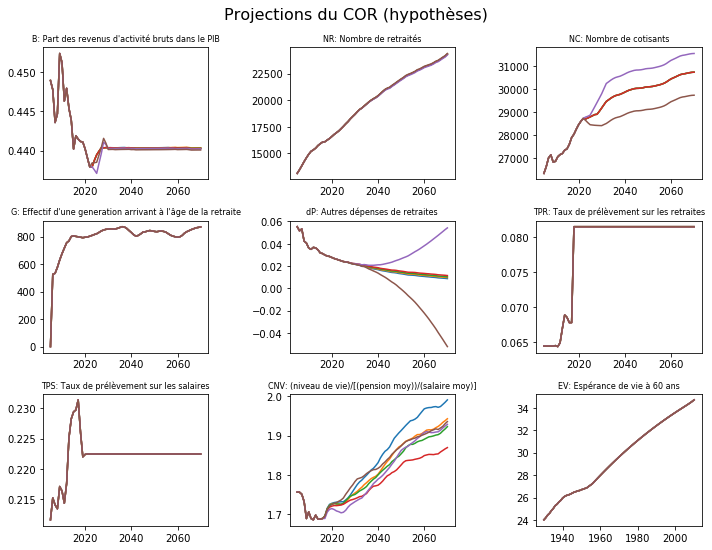

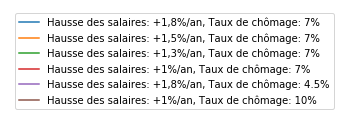

In [2]:
simulateur = SimulateurRetraites()
simulateur.dessineConjoncture()
simulateur.dessineLegende()

## Hypothèses de calcul

Pour la trajectoire de dépenses, nous considérons les mêmes niveaux de dépenses de les dépenses de l'étude d'impact de 2020 à 2050. Pour la période 2050-2070, nous faisons l'hypothèse que le niveau de dépense s'abaisse jusqu'à la moyenne 12,6 % du PIB dans l’UE-15. 

In [3]:
etudeImpact = EtudeImpact(simulateur)
analyse_etudeImpact = etudeImpact.calcule()

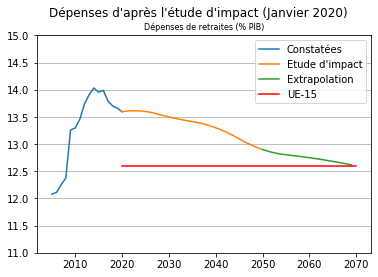

In [4]:
pl.suptitle("Dépenses d'après l'étude d'impact (Janvier 2020)");
# Scénario central : Hausse = +1.3% PIB, Chômage 7%
scenario_central = simulateur.scenario_central 
scenarios = [scenario_central]
annees_constatees = range(analyse_etudeImpact.annees[0], 2021)
annees_EI = range(2020, etudeImpact.depenses_annee_extrapolation+1)
annees_extrapolation = range(etudeImpact.depenses_annee_extrapolation, 2070)
analyse_etudeImpact.graphique("Depenses", dessine_legende= False, 
                              scenarios_indices = scenarios, 
                              dessine_annees = annees_constatees)
analyse_etudeImpact.graphique("Depenses", dessine_legende= False, 
                              scenarios_indices = scenarios, 
                              dessine_annees = annees_EI)
analyse_etudeImpact.graphique("Depenses", dessine_legende= False, 
                              scenarios_indices = scenarios, 
                              dessine_annees = annees_extrapolation)
pl.grid(axis="y")
nb_annees = len(simulateur.annees_futures)
pl.plot(simulateur.annees_futures,[12.6]*nb_annees, "r-", label="UE-15")
pl.legend(["Constatées","Etude d'impact","Extrapolation","UE-15"]);
pl.savefig("../Article4/Simulation-Depenses.pdf")

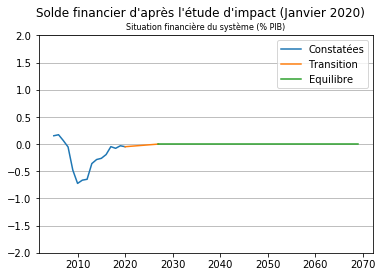

In [5]:
pl.suptitle("Solde financier d'après l'étude d'impact (Janvier 2020)");
annees_EI = range(2020, etudeImpact.solde_annee_equilibre+1)
annees_extrapolation = range(etudeImpact.solde_annee_equilibre, 2070)
analyse_etudeImpact.graphique("S", dessine_legende= False, 
                              scenarios_indices = scenarios, 
                              dessine_annees = annees_constatees)
analyse_etudeImpact.graphique("S", dessine_legende= False, 
                              scenarios_indices = scenarios, 
                              dessine_annees = annees_EI)
analyse_etudeImpact.graphique("S", dessine_legende= False, 
                              scenarios_indices = scenarios, 
                              dessine_annees = annees_extrapolation)
pl.grid(axis="y")
pl.legend(["Constatées","Transition","Equilibre"]);
pl.savefig("../Article4/Simulation-Solde-Financier.pdf")

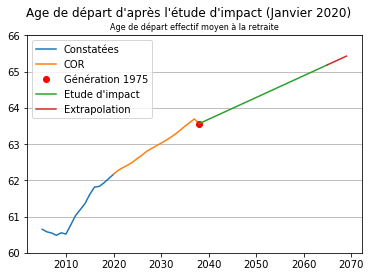

In [6]:
pl.suptitle("Age de départ d'après l'étude d'impact (Janvier 2020)");
annees_COR = range(2020, int(etudeImpact.age_annee_transition)+1)
annees_EI = range(int(etudeImpact.age_annee_transition), 
                  int(etudeImpact.age_annee_extrapolation)+1)
annees_extrapolation = range(etudeImpact.age_annee_extrapolation, 2070)
analyse_etudeImpact.graphique("A", dessine_legende= False, 
                              scenarios_indices = scenarios, 
                              dessine_annees = annees_constatees)
analyse_etudeImpact.graphique("A", dessine_legende= False, 
                              scenarios_indices = scenarios, 
                              dessine_annees = annees_COR)
age_annee_transition = etudeImpact.age_annee_transition
pl.plot(age_annee_transition, 
        analyse_etudeImpact.A[scenario_central][int(age_annee_transition)], "ro")
analyse_etudeImpact.graphique("A", dessine_legende= False, 
                              scenarios_indices = scenarios, 
                              dessine_annees = annees_EI)
analyse_etudeImpact.graphique("A", dessine_legende= False, 
                              scenarios_indices = scenarios, 
                              dessine_annees = annees_extrapolation)
pl.grid(axis="y")
pl.ylim(top = 66.0)
legende_transition = "Génération %d" % (etudeImpact.premiere_generation)
pl.legend(["Constatées","COR",legende_transition,"Etude d'impact","Extrapolation"]);
pl.savefig("../Article4/Simulation-Age.pdf")

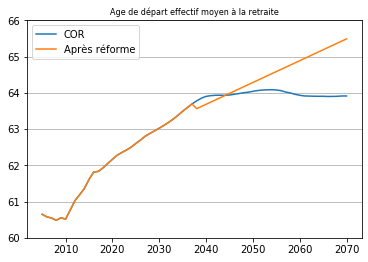

In [7]:
analyse_COR = simulateur.pilotageCOR()
analyse_COR.graphique("A", dessine_legende= False, 
                      scenarios_indices = scenarios)
analyse_etudeImpact.graphique("A", dessine_legende= False, 
                              scenarios_indices = scenarios)
pl.legend(["COR","Après réforme"])
pl.grid(axis="y")
pl.ylim(top = 66.0)
pl.savefig("../Article4/Simulation-Age-vs-COR.pdf")

On observe une discontinuité de l'âge de départ à la retraite en 2038. Celle-ci est compatible avec le graphique 73 page 199 de l'étude d'impact. 

## Simulation de l'étude d'impact

Cette stratégie de pilotage est celle dans laquelle :
* le bilan financier est celui de l'étude d'impact (Janvier 2020),
* l'âge de départ à la retraite est celui du COR (Juin 2019),
* le montant des dépenses est celui de l'étude d'impact (Janvier 2020).

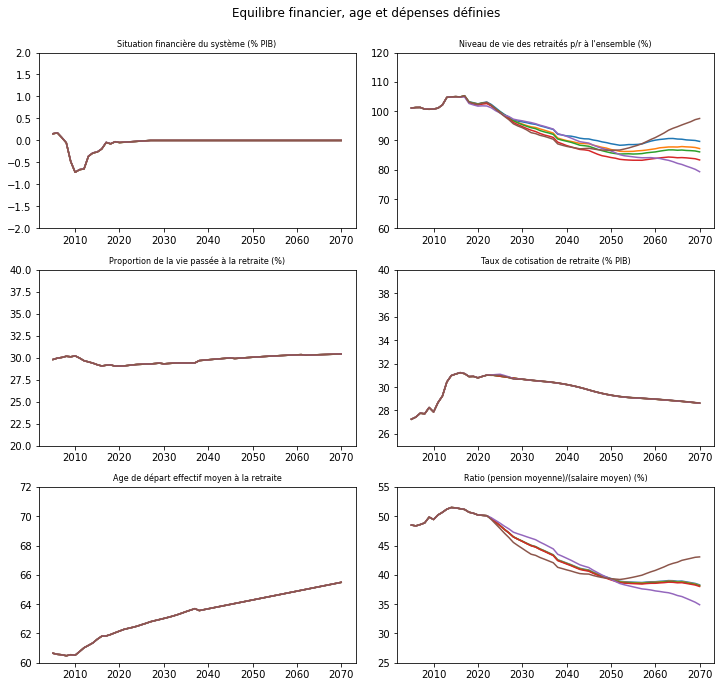

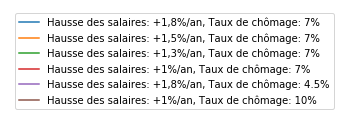

In [8]:
pl.figure(figsize=(10,10))
pl.suptitle(u"Equilibre financier, age et dépenses définies")
analyse_etudeImpact.dessineSimulation()
analyse_etudeImpact.dessineLegende()
pl.savefig("../Article4/Simulation-legende.pdf")

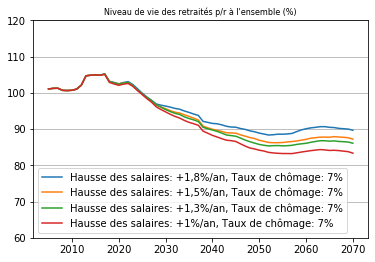

In [9]:
analyse_etudeImpact.graphique("RNV", dessine_legende = True, 
                              scenarios_indices = range(1,5))
pl.grid(axis="y")

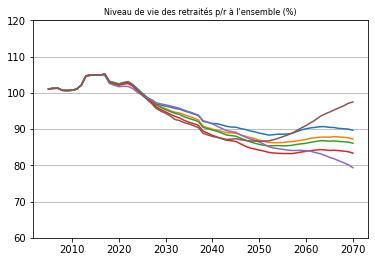

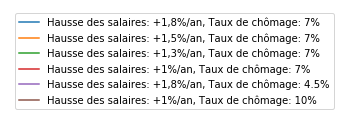

In [10]:
analyse_etudeImpact.graphique("RNV")
pl.grid(axis="y")
pl.savefig("../Article4/Simulation-RNV.pdf")
analyse_etudeImpact.dessineLegende()
pl.savefig("../Article4/Simulation-legende.pdf")

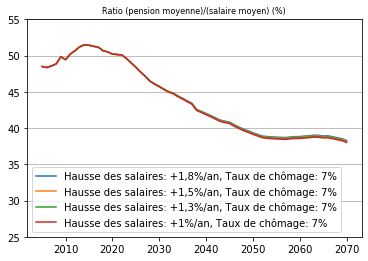

In [11]:
analyse_etudeImpact.graphique("P", dessine_legende = True, 
                              scenarios_indices = range(1,5))
pl.grid(axis="y")

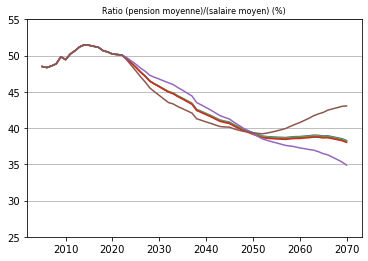

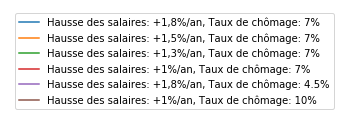

In [12]:
analyse_etudeImpact.graphique("P")
pl.grid(axis="y")
pl.savefig("../Article4/Simulation-P.pdf")
analyse_etudeImpact.dessineLegende()

## Vérification des paramètres imposés

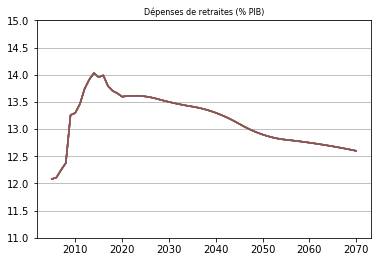

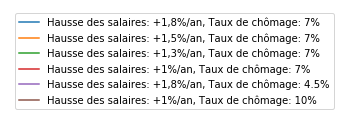

In [13]:
analyse_etudeImpact.graphique("Depenses")
pl.grid(axis="y")
analyse_etudeImpact.dessineLegende()

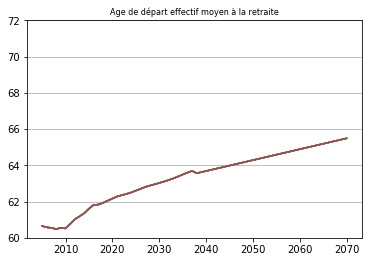

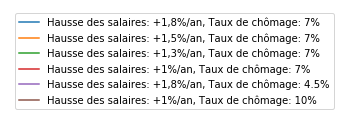

In [14]:
analyse_etudeImpact.graphique("A")
pl.grid(axis="y")
analyse_etudeImpact.dessineLegende()

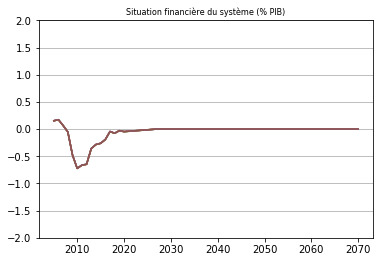

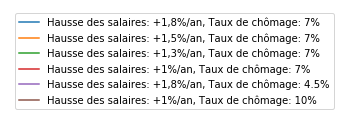

In [15]:
analyse_etudeImpact.graphique("S")
pl.grid(axis="y")
analyse_etudeImpact.dessineLegende()

On constate que l'on reproduit correctement les dépenses, l'âge de départ à la retraite ainsi que le solde financier indiqués dans l'étude d'impact.

# Paramètre du simulateur du COR

In [16]:
analyse_etudeImpact.afficheSolutionsSimulateurCOR()

Valeurs à rentrer sur le simulateur officiel du COR:

Scenario 1 :  Hausse des salaires: +1,8%/an, Taux de chômage: 7%
Annéee, Age,      Cotis., Pension:
 2020 : 62.2 ans, 30.8 %, 50.2 %
 2025 : 62.6 ans, 30.9 %, 48.4 %
 2030 : 63.0 ans, 30.7 %, 45.8 %
 2040 : 63.7 ans, 30.2 %, 42.0 %
 2050 : 64.3 ans, 29.3 %, 39.4 %
 2060 : 64.9 ans, 29.0 %, 38.8 %
 2070 : 65.5 ans, 28.6 %, 38.3 %

Scenario 2 :  Hausse des salaires: +1,5%/an, Taux de chômage: 7%
Annéee, Age,      Cotis., Pension:
 2020 : 62.2 ans, 30.8 %, 50.2 %
 2025 : 62.6 ans, 30.9 %, 48.4 %
 2030 : 63.0 ans, 30.7 %, 45.7 %
 2040 : 63.7 ans, 30.2 %, 42.0 %
 2050 : 64.3 ans, 29.3 %, 39.3 %
 2060 : 64.9 ans, 29.0 %, 38.7 %
 2070 : 65.5 ans, 28.6 %, 38.2 %

Scenario 3 :  Hausse des salaires: +1,3%/an, Taux de chômage: 7%
Annéee, Age,      Cotis., Pension:
 2020 : 62.2 ans, 30.8 %, 50.2 %
 2025 : 62.6 ans, 30.9 %, 48.4 %
 2030 : 63.0 ans, 30.7 %, 45.7 %
 2040 : 63.7 ans, 30.2 %, 41.9 %
 2050 : 64.3 ans, 29.3 %, 39.2 %
 2060 : 64.9 ans,